In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df=sns.load_dataset('tips')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# 1) composition of data shape

# 1) this is composed of how many rows and columns?
# 2) how many numerical and categorical columns are there?
# 3) check for missing values.  If there are any, deal with them appropriately.
# 4) what is the average total bill amount?     
# 5) what are the different unique values in the 'sex' column?
# 6) how many    male  and female customers are there in the dataset?
# 7) what is the average total bill amount for  male  and female customers?

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [8]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

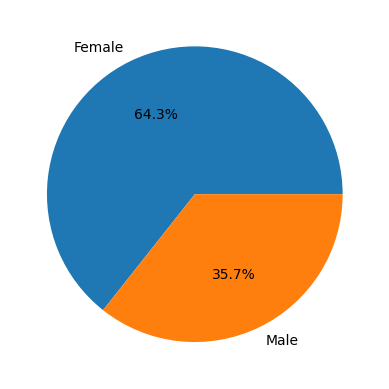

In [10]:
# now crate a pie chart for whole dataset
plt.pie(df['sex'].value_counts(), labels=df['sex'].unique(), autopct='%1.1f%%')
plt.show()  


# distribution  of data 

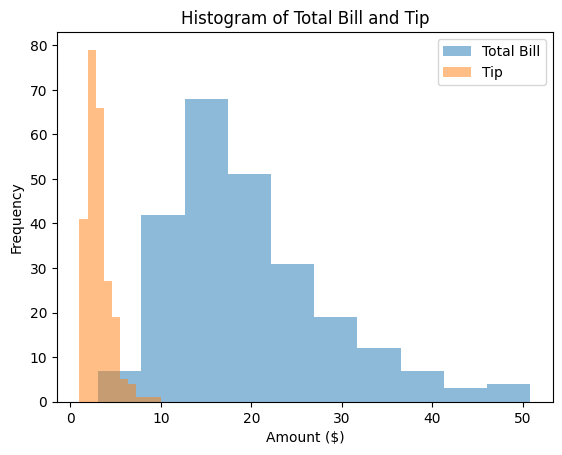

In [12]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

# histogram between total bill and tip
plt.hist(df['total_bill'], bins=10, alpha=0.5, label='Total Bill')
plt.hist(df['tip'], bins=10, alpha=0.5, label='Tip')
plt.xlabel('Amount ($)')    
plt.ylabel('Frequency')
plt.title('Histogram of Total Bill and Tip')
plt.legend()
plt.show()


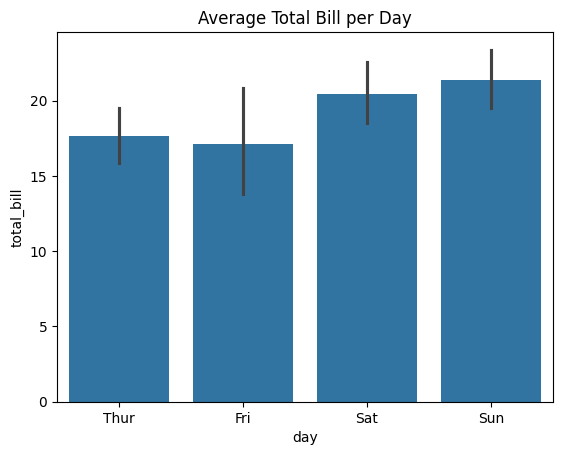

In [13]:
# bar plot for ctegorical column against total bill
sns.barplot(x='day', y='total_bill', data=df)   
plt.title('Average Total Bill per Day')
plt.show()
# --- IGNORE ---


**EDA — Composition**

We'll inspect shape, dtypes, missing values, and basic summaries.

In [15]:
# load dataset (already used earlier)
df = sns.load_dataset('tips')

# composition: rows, columns
print('Shape (rows, columns):', df.shape)

# datatypes and counts of numeric vs categorical
print('Data types and counts:')
print(df.dtypes.value_counts())

# missing values summary
print('Missing values per column:')
print(df.isnull().sum())

# quick head and describe
print('First 5 rows:')
print(df.head())
print('Numeric summary:')
print(df.describe())

Shape (rows, columns): (244, 7)
Data types and counts:
float64     2
category    1
category    1
category    1
category    1
int64       1
Name: count, dtype: int64
Missing values per column:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
First 5 rows:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Numeric summary:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3

**EDA — Distribution**

Examine distributions of numeric columns and outliers.

Numeric columns: ['total_bill', 'tip', 'size']


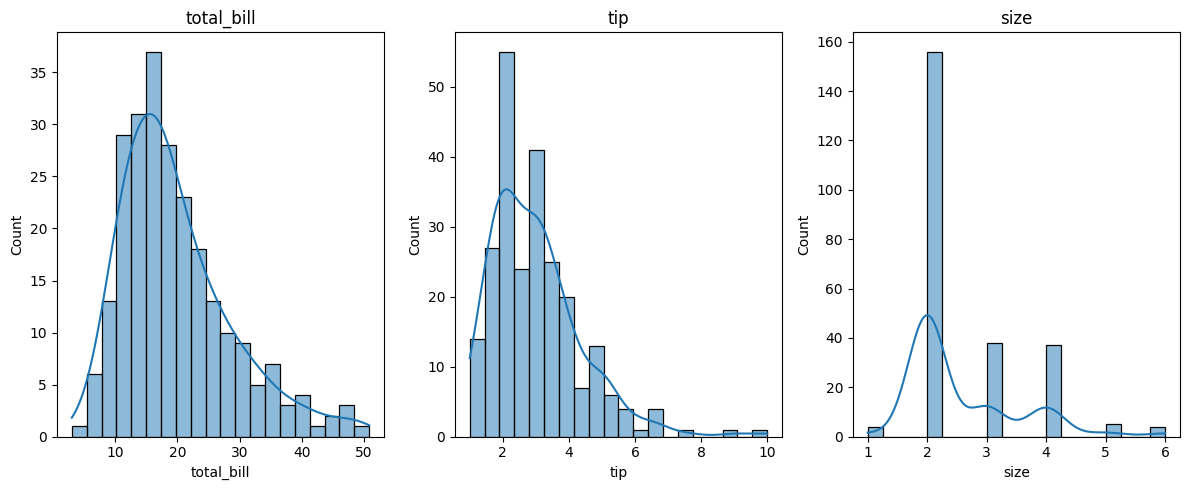

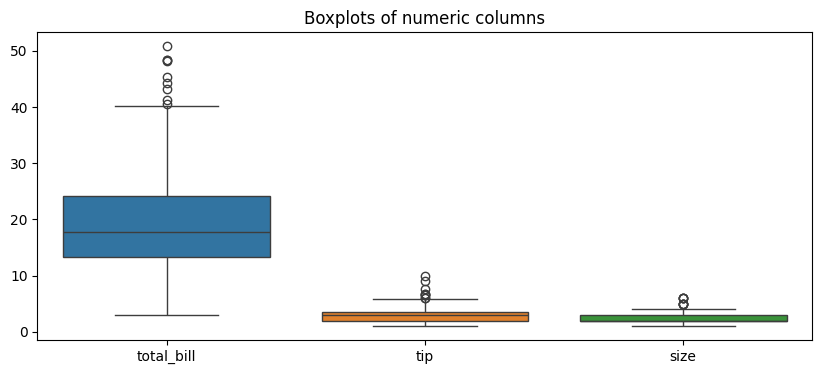

In [16]:
# Distribution plots for numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print('Numeric columns:', num_cols)

plt.figure(figsize=(12,5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()

# boxplots to inspect outliers
plt.figure(figsize=(10,4))
sns.boxplot(data=df[num_cols])
plt.title('Boxplots of numeric columns')
plt.show()

**EDA — Relations**

Look at relationships between `total_bill`, `tip`, and categorical groupings.

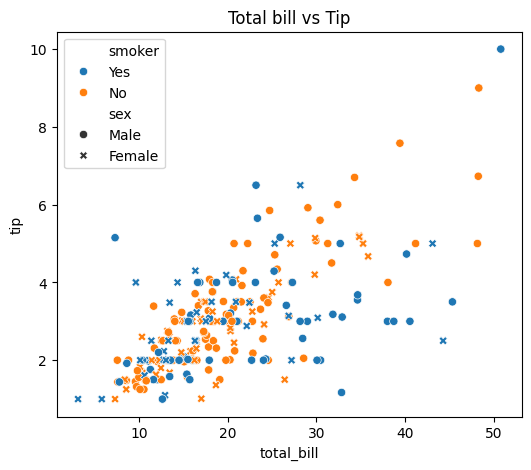

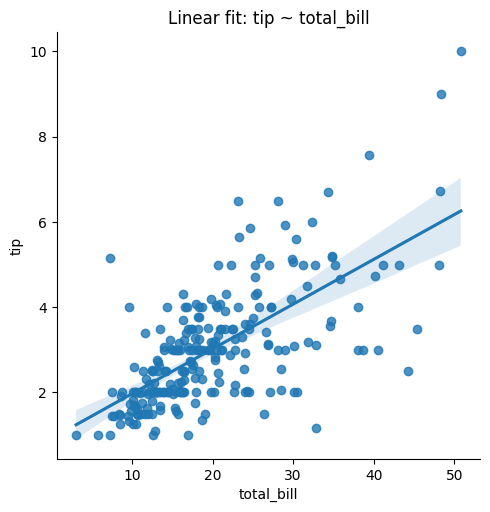

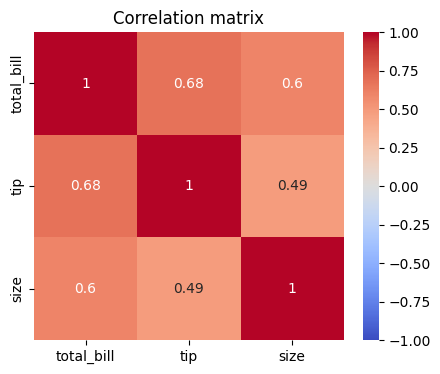

In [17]:
# Scatter and regression between total_bill and tip
plt.figure(figsize=(6,5))
sns.scatterplot(x='total_bill', y='tip', hue='smoker', style='sex', data=df)
plt.title('Total bill vs Tip')
plt.show()

# linear fit to show trend
sns.lmplot(x='total_bill', y='tip', data=df, height=5, aspect=1)
plt.title('Linear fit: tip ~ total_bill')
plt.show()

# correlation heatmap for numeric cols
corr = df[num_cols].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

**Aggregations & Grouped Statistics**

Compute averages and counts by categories (`sex`, `day`, `smoker`).

Average total_bill: 19.79
Average tip: 3.00
Unique values in sex: ['Female', 'Male']
Categories (2, object): ['Male', 'Female']
Counts by sex:
sex
Male      157
Female     87
Name: count, dtype: int64
Average total_bill by sex:
sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64
Average totals by day:
      total_bill       tip
day                       
Thur   17.682742  2.771452
Fri    17.151579  2.734737
Sat    20.441379  2.993103
Sun    21.410000  3.255132
Average totals by smoker:
        total_bill       tip
smoker                      
Yes      20.756344  3.008710
No       19.188278  2.991854
Average tip % by day and time:
time      Lunch     Dinner
day                       
Thur  16.130074  15.974441
Fri   18.876489  15.891611
Sat         NaN  15.315172
Sun         NaN  16.689729


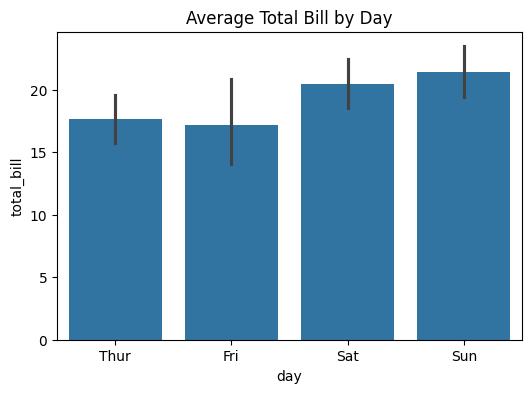

In [18]:
# overall averages
print('Average total_bill: {:.2f}'.format(df['total_bill'].mean()))
print('Average tip: {:.2f}'.format(df['tip'].mean()))

# unique values and counts for 'sex'
print('Unique values in sex:', df['sex'].unique())
print('Counts by sex:')
print(df['sex'].value_counts())

# average total_bill by sex
print('Average total_bill by sex:')
print(df.groupby('sex')['total_bill'].mean())

# average tip and total bill by day and smoker status
print('Average totals by day:')
print(df.groupby('day')[['total_bill','tip']].mean())

print('Average totals by smoker:')
print(df.groupby('smoker')[['total_bill','tip']].mean())

# pivot: average tip percentage by day and time
df['tip_pct'] = df['tip'] / df['total_bill'] * 100
pivot = df.pivot_table(values='tip_pct', index='day', columns='time', aggfunc='mean')
print('Average tip % by day and time:')
print(pivot)

# show a barplot of average total_bill by day
plt.figure(figsize=(6,4))
sns.barplot(x='day', y='total_bill', data=df, estimator=np.mean)
plt.title('Average Total Bill by Day')
plt.show()